# SIR model
Susceptible, infected, recovered

Ref: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [26]:
# SIR model
def model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I / (N * N)
    dIdt = beta * S * I / (N * N) - gamma * I / N
    dRdt = gamma * I / N
    return dSdt, dIdt, dRdt

def model2(y, t, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


# domain (time) grid
t_final = 400
t = np.linspace(0, t_final, t_final)

In [27]:
# plot the results
def plot_results(data):
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, data[0], 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, data[1], 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, data[2], 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number')
    ax.grid(True)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()


beta: 0.001, gamma: 0.07142857142857142, R_0: 0.014


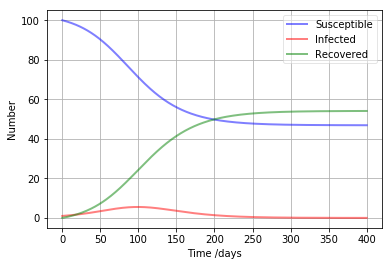

In [52]:

y0 = 100, 1, 0
gamma = 1. / 14
beta = 0.001
print(f'beta: {beta}, gamma: {gamma}, R_0: {beta/gamma}')
ret = odeint(model2, y0, t, args=(beta, gamma))
plot_results(ret.T)


recovery time 124.63685494351522
R_0 is 2.6744354418548528e-08


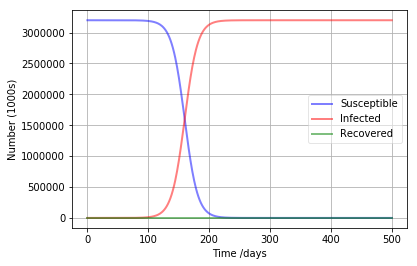

In [16]:
# Total Population
population = 3200000
#population = 1000

t_final = 500

# Initial infected and recovered
I0, R0 = 1, 0
S0 = population - I0 - R0


# contact rate
#beta = 0.0001
#beta = 1e-4
#beta = 0.00003974
beta = 300000.1

# mean recovery  ()
recovery_time = 21
gamma = 1.0/recovery_time
gamma = .008023309
print(f'recovery time {1./gamma}')

print(f'R_0 is {gamma/beta}')





y0 = S0, I0, R0
ret = odeint(model, y0, t, args=(population, beta, gamma))
S, I, R = ret.T

# plot the results
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.grid(True)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [4]:
# R0 is defined as beta/gamma
beta/gamma

1.8695528241527277

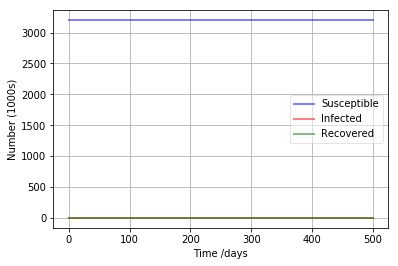

In [5]:
# plot the results
def plot_results(data):
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, data[0]/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, data[1]/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, data[2]/1000, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.grid(True)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
plot_results(ret.T)

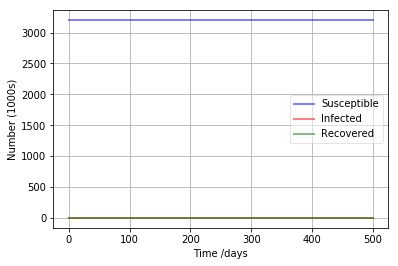

In [6]:
beta = .12
ret = odeint(model, y0, t, args=(population, beta, gamma))
plot_results(ret.T)

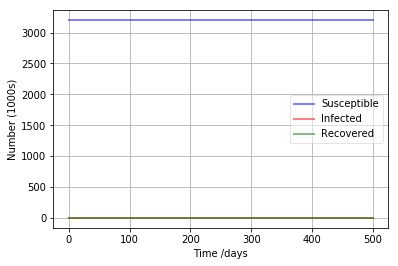

In [7]:
beta = gamma/3
plot_results(odeint(model, y0, t, args=(population, beta, gamma)).T)
